### Dimension Reduction

In [3]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

## Download MNIST mat file from GitHub
import os
from sklearn import datasets
import urllib.request


In [4]:

## loading data
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

## Convert matrix/vector to Pandas DataFrame
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))


(70000, 784) (70000,)
Size of the dataframe: (70000, 786)


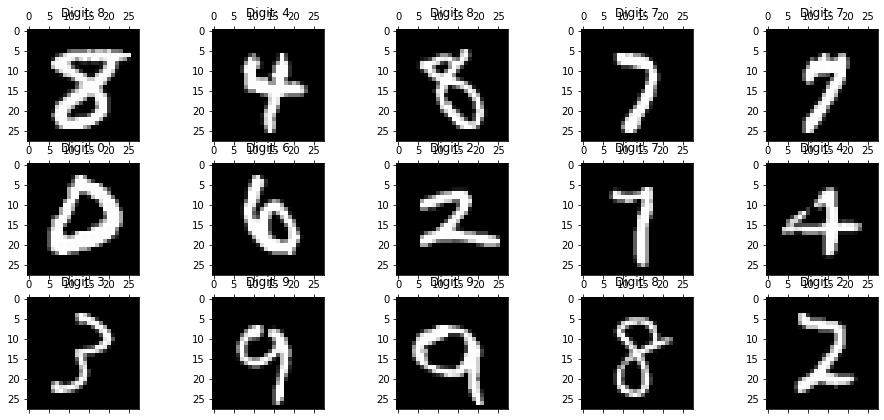

In [5]:

## For Reproducibility  of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
    
## Plot image
fig = plt.figure( figsize=(16,7) )
plt.gray()
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()


Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


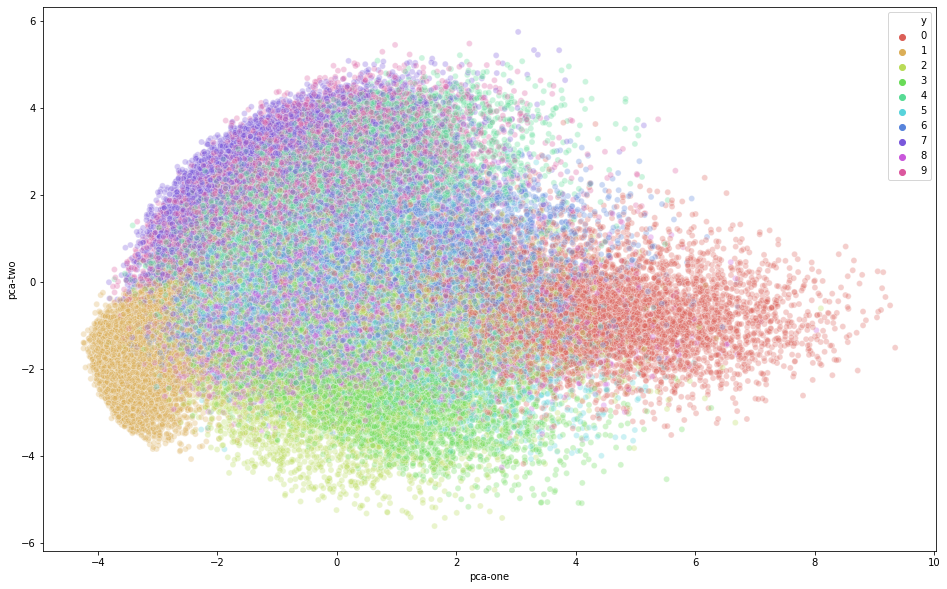

In [6]:

## PCA for full data
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# plot PCA features, 1st & 2nd components
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
plt.show()


변수 선택, 오늘 부터는 변수 추출임. 원래 존재하는 변수들 중에서 중요한 변수들의 부분 집합을 선택하는 기법이였다면, 변수 추출 (extraction) 의 목적은 데이터가 가지는 속성을 최대한 보존하는 방향으로 새로운 변수를 생성하는 것을 의미한다.

주성분 분석의 목적 : 서로가 직교하는 기저를 찾는 것임. 기저는 원본 데이터의 분산을 최대한 보존하는 기저를 찾는 것이다.

PCA 의 절차
- 데이터의 평균을 0으로 맞추어 준다 : 공분산 행렬을 구할때, 사용되는 X-X' 를 구하기 위함. 
- X 의 하나의 벡터가 W 라는 기저에 사영이 되었을 때, 기저를 뽑은 후, 재구축 오차를 이용해서 이상치 탐지에 적용할 수 있다. 주성분 분석을 수행했을 때 몇가지 이슈가 발생함 

##### 몇개의 기저를 사용할 것인가? 

- 정량적 방법 : 전체 데이터의 분산은 공분산 행렬의 총 합이다. k 번째 기저에 사영을 시켰을 때, 분자가 k 번째 고유값이다. 이것이 바로 보존되는 분산 량이다. 
- 정성적 방법 : 도메인 전문가 '각각의 주성분의 갯수가 증가할 수록, 최초 주성분 분산들이 보존이 되고 급격하게 감소하는 경향을 보인다. Elbow point 를 찾는다. 과거의 최대한 데이터의 80% 를 보존해야한다는 기준을 정해서 넘은 것들

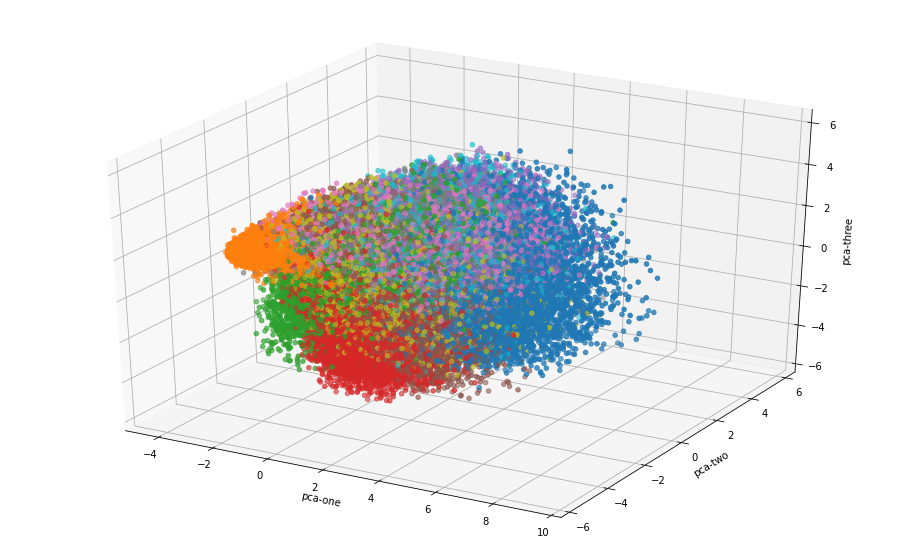

In [17]:

# plot PCA features, 1st, 2nd, and 3rd components
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"].astype(int),
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


Explained variation per principal component: [0.09819946 0.07123677 0.06113222]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.648s...
[t-SNE] Computed neighbors for 10000 samples in 85.463s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.117975
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.8446

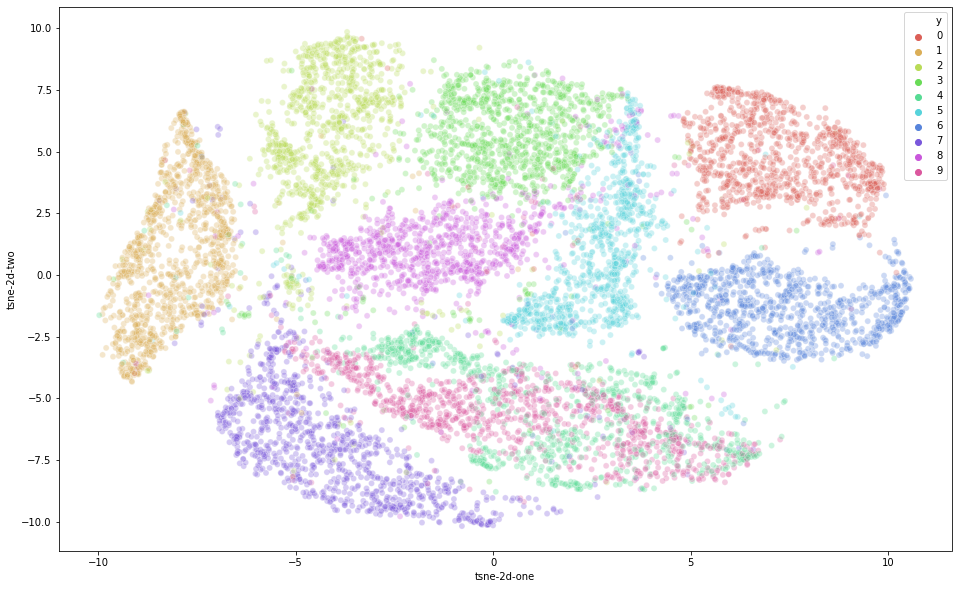

In [18]:

## t-SNE 
# PCA for sampled data (N=10000)
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# t-SNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# plot
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()


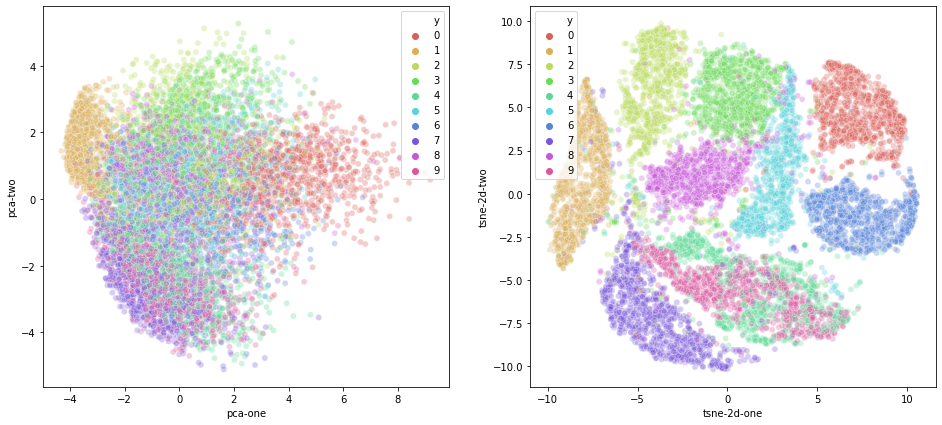

In [19]:

## PCA vs. t-SNE
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()



In [ ]:
## t-SNE after PCA 50
# PCA 50
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
# t-SNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# plot
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)
plt.show()

Cumulative explained variation for 50 principal components: 0.8261610590761399
